## **1. Tải bộ dữ liệu**


In [ ]:
!gdown --id 1-2z8eDpuE1qpnzFr9W8aKrrrctt9LST0

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-2z8eDpuE1qpnzFr9W8aKrrrctt9LST0
To: /content/fer_2013.zip
100% 64.1M/64.1M [00:00<00:00, 211MB/s]


In [ ]:
!unzip fer_2013.zip 

Streaming output truncated to the last 5000 lines.
 extracting: fer_2013/train/angry/Training_25806207.jpg  
 extracting: fer_2013/train/angry/Training_61140206.jpg  
 extracting: fer_2013/train/angry/Training_24737960.jpg  
 extracting: fer_2013/train/angry/Training_41062954.jpg  
 extracting: fer_2013/train/angry/Training_62704105.jpg  
 extracting: fer_2013/train/angry/Training_84772308.jpg  
 extracting: fer_2013/train/angry/Training_52788224.jpg  
 extracting: fer_2013/train/angry/Training_55923353.jpg  
 extracting: fer_2013/train/angry/Training_71282551.jpg  
 extracting: fer_2013/train/angry/Training_39764127.jpg  
 extracting: fer_2013/train/angry/Training_9436506.jpg  
 extracting: fer_2013/train/angry/Training_72989732.jpg  
 extracting: fer_2013/train/angry/Training_47170134.jpg  
 extracting: fer_2013/train/angry/Training_83320847.jpg  
 extracting: fer_2013/train/angry/Training_12513174.jpg  
 extracting: fer_2013/train/angry/Training_51002390.jpg  
 extracting: fer_2013/

## **2. Đọc bộ dữ liệu**

### 2.1. Import các thư viện cần thiết

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

### 2.2. Khai báo các biến chứa dữ liệu train và val

In [ ]:
fer2013_path = './fer_2013' # Đường dẫn đến folder dataset
train_fer2013_path = os.path.join(fer2013_path, 'train') # Đường dẫn đến folder dataset train
val_fer2013_path = os.path.join(fer2013_path, 'val') # Đường dẫn đến folder dataset val

BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
RANDOM_SEED = 1

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_fer2013_path, # Đường dẫn đến bộ train
    seed=RANDOM_SEED, # Cài đặt random seed cho việc shuffle và các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    shuffle=True, # Bật chế độ shuffle dataset
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_fer2013_path, # Đường dẫn đến bộ val
    seed=RANDOM_SEED, # Cài đặt random seed cho các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


### 2.3. Visualize một số mẫu dữ liệu

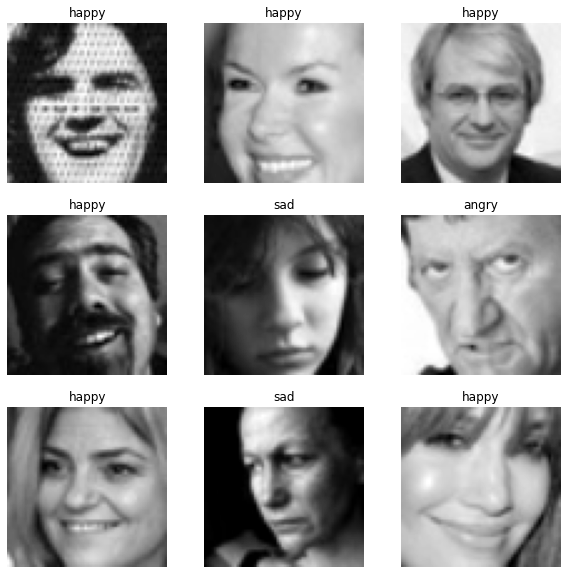

In [ ]:
class_names = train_ds.class_names # Lấy danh sách tên của các class trong bộ dữ liệu
n_classes = len(class_names) # Lấy số lượng class

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung hình
for images, labels in train_ds.take(1): # Duyệt qua 1 batch của bộ train
    for i in range(9): # Duyệt qua 9 mẫu dữ liệu trong 1 batch
        ax = plt.subplot(3, 3, i + 1) # Khởi tạo khung hình nhỏ cho 1 mẫu dữ liệu
        img = images[i].numpy().squeeze(axis=-1).astype("uint8") # Đọc ảnh của mẫu dữ liệu i, xóa dimension tại vị trí -1, chuyển kiểu dữ liệu sang dạng uint8
        label = class_names[labels[i]] # Đọc label của mẫu dữ liệu i
        plt.imshow(img, cmap='gray') # Show ảnh lên khung hình đã tạo
        plt.title(label) # Đặt title (dòng chữ trên hình) là label
        plt.axis("off") # Tắt hiện khung giá trị trục x, y

plt.show() # Hiển thị 9 khung ảnh nhỏ

## **3. Xây dựng mô hình phân loại ảnh**

In [ ]:
# Khai báo hàm xây dựng mô hình phân lớp
def classification_model(n_classes, input_shape, initializer, activation='relu'):
    ### BẮT ĐẦU CODE TẠI ĐÂY ###
    model = tf.keras.Sequential([
        tf.keras.Input(input_shape), # Input layer. Có thể sử dụng: tf.keras.layers.Flatten(input_shape) để bỏ bớt tf.keras.Input
        tf.keras.layers.Flatten(), # Layer flatten ảnh thành vector 1D
        tf.keras.layers.Dense(256, activation=activation, kernel_initializer=initializer), # Hidden layer 1 với 256 nodes
        tf.keras.layers.Dense(n_classes, activation='softmax', kernel_initializer=initializer) # Output layer
    ])
    ### KẾT THÚC CODE TẠI ĐÂY ###

    return model

## **4. Khai báo siêu tham số và một số cài đặt khác**

In [ ]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Khai báo một số giá trị siêu tham số
input_shape = (IMG_HEIGHT, IMG_WIDTH)
EPOCHS = 200
LR = 1e-4

In [ ]:
# Khai báo một list dùng để chứa các model.history
all_history = []

## **5. Huấn luyện các mô hình**

### 5.1. GlorotUniform

In [ ]:
initializer = tf.keras.initializers.GlorotUniform() # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 13s 12ms/step - loss: 36.2428 - accuracy: 0.2304 - val_loss: 23.7435 - val_accuracy: 0.2373
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 18.6692 - accuracy: 0.2462 - val_loss: 16.4702 - val_accuracy: 0.2233
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 15.7104 - accuracy: 0.2527 - val_loss: 19.3654 - val_accuracy: 0.2047
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 14.2388 - accuracy: 0.2589 - val_loss: 13.3590 - val_accuracy: 0.2091
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 12.7766 - accuracy: 0.2602 - val_loss: 12.7331 - val_accuracy: 0.2646
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 11.2858 - accuracy: 0.2630 - val_loss: 12.4595 - val_accuracy: 0.2334
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 11.1297 - accuracy: 0.2625 - val_loss: 11.2704 - val_

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('glorot_uniform', model.history.history))

### 5.2. HeUniform

In [ ]:
initializer = tf.keras.initializers.HeUniform() # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1048832   
                                                                 
 dense_3 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 3s 3ms/step - loss: 32.8191 - accuracy: 0.2230 - val_loss: 24.3738 - val_accuracy: 0.1934
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 17.9608 - accuracy: 0.2465 - val_loss: 19.6993 - val_accuracy: 0.2058
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 14.9148 - accuracy: 0.2497 - val_loss: 17.9519 - val_accuracy: 0.1895
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 13.2207 - accuracy: 0.2569 - val_loss: 13.1669 - val_accuracy: 0.2275
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 12.0177 - accuracy: 0.2594 - val_loss: 14.9586 - val_accuracy: 0.2158
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 11.0443 - accuracy: 0.2594 - val_loss: 12.3013 - val_accuracy: 0.3004
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 10.7036 - accuracy: 0.2625 - val_loss: 14.3519 - val_ac

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('he_uniform', model.history.history))

### 5.3. LecunUniform

In [ ]:
initializer = tf.keras.initializers.LecunUniform() # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1048832   
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 3s 3ms/step - loss: 14.1062 - accuracy: 0.2228 - val_loss: 6.0789 - val_accuracy: 0.2809
Epoch 2/200
898/898 [==============================] - 3s 4ms/step - loss: 5.9516 - accuracy: 0.2419 - val_loss: 5.0872 - val_accuracy: 0.2340
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 4.6677 - accuracy: 0.2533 - val_loss: 5.1227 - val_accuracy: 0.2283
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 3.8568 - accuracy: 0.2620 - val_loss: 3.4749 - val_accuracy: 0.2488
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 2.5874 - accuracy: 0.2222 - val_loss: 1.9401 - val_accuracy: 0.2509
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9130 - accuracy: 0.2600 - val_loss: 1.9196 - val_accuracy: 0.2499
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 1.8938 - accuracy: 0.2602 - val_loss: 1.9082 - val_accuracy: 0.250

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('lecun_uniform', model.history.history))

### 5.4. RandomUniform

In [ ]:
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1., seed=RANDOM_SEED) # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1048832   
                                                                 
 dense_7 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 4s 4ms/step - loss: 130594.8750 - accuracy: 0.1998 - val_loss: 3016.3171 - val_accuracy: 0.2177
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 3171.4583 - accuracy: 0.2202 - val_loss: 2710.7026 - val_accuracy: 0.2364
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 2780.7417 - accuracy: 0.2306 - val_loss: 2341.2195 - val_accuracy: 0.2421
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 2526.6580 - accuracy: 0.2404 - val_loss: 2940.2903 - val_accuracy: 0.2106
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 2318.0708 - accuracy: 0.2393 - val_loss: 1978.2560 - val_accuracy: 0.2261
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 2435.1907 - accuracy: 0.2394 - val_loss: 2823.9653 - val_accuracy: 0.2090
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 2232.7356 - accuracy: 0.2441 

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('random_uniform', model.history.history))

### 5.5. TruncatedNormal

In [ ]:
initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1., seed=RANDOM_SEED) # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               1048832   
                                                                 
 dense_9 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 3s 3ms/step - loss: 22028.2578 - accuracy: 0.1849 - val_loss: 17049.2656 - val_accuracy: 0.1956
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 15204.2227 - accuracy: 0.2138 - val_loss: 14074.7451 - val_accuracy: 0.2056
Epoch 3/200
898/898 [==============================] - 3s 4ms/step - loss: 12898.8037 - accuracy: 0.2292 - val_loss: 12430.7568 - val_accuracy: 0.2225
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 11620.7881 - accuracy: 0.2377 - val_loss: 11424.9453 - val_accuracy: 0.2339
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 10722.8428 - accuracy: 0.2460 - val_loss: 10605.3311 - val_accuracy: 0.2375
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 9997.7559 - accuracy: 0.2513 - val_loss: 9998.5078 - val_accuracy: 0.2400
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 9413.5479 - accuracy:

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('truncated_normal', model.history.history))

### 5.6. VarianceScaling

In [ ]:
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform', seed=RANDOM_SEED) # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               1048832   
                                                                 
 dense_11 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 3s 3ms/step - loss: 2.5632 - accuracy: 0.2595 - val_loss: 1.8188 - val_accuracy: 0.2910
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 1.8116 - accuracy: 0.2728 - val_loss: 1.7795 - val_accuracy: 0.2768
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 1.7879 - accuracy: 0.2722 - val_loss: 1.7710 - val_accuracy: 0.2699
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 1.7772 - accuracy: 0.2743 - val_loss: 1.7715 - val_accuracy: 0.2700
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 1.7665 - accuracy: 0.2810 - val_loss: 1.7492 - val_accuracy: 0.2944
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 1.7477 - accuracy: 0.2895 - val_loss: 1.7328 - val_accuracy: 0.2988
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 1.7422 - accuracy: 0.2995 - val_loss: 1.7310 - val_accuracy: 0.2988

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('variance_scaling', model.history.history))

## **6. Trực quan hóa kết quả các mô hình**

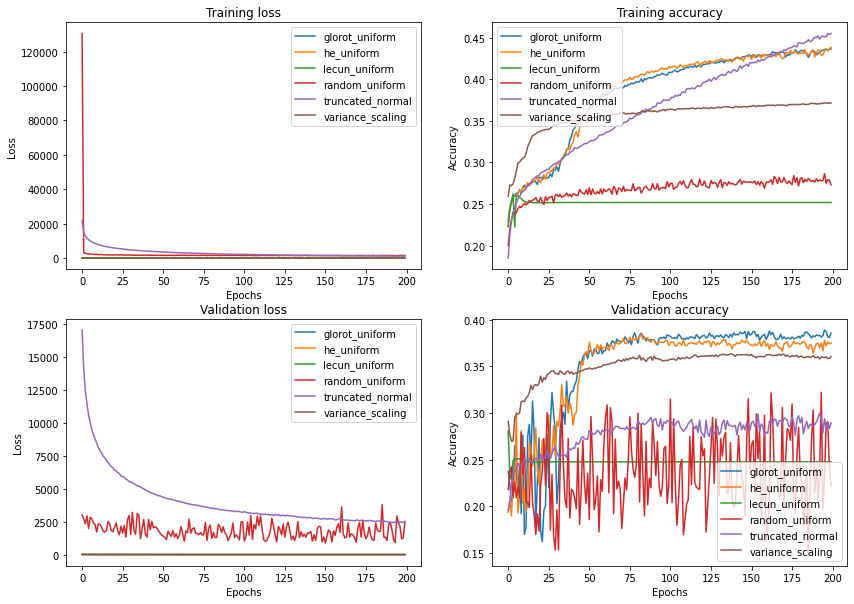

In [ ]:
colors_lst = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
i = 0
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for history in all_history:
    initializer = history[0]
    color = colors_lst[i]
    train_loss, train_acc = history[1]['loss'], history[1]['accuracy']
    val_loss, val_acc = history[1]['val_loss'], history[1]['val_accuracy']

    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training loss')
    axes[0, 0].plot(train_loss, color=color, label=initializer)

    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Training accuracy')
    axes[0, 1].plot(train_acc, color=color, label=initializer)

    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].set_title('Validation loss')
    axes[1, 0].plot(val_loss, color=color, label=initializer)

    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title('Validation accuracy')
    axes[1, 1].plot(val_acc, color=color, label=initializer)

    i += 1

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

plt.show()